In [19]:
import os
import json
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [40]:
# Load the JSON file
with open("../../WLASL/WLASL_v0.3.json", 'r') as file:
    data = json.load(file)

# List of gestures to search for
gestures_to_search = ["hello", "thank you", "yes", "no", "drink", "go", "who","help","candy"]

# Extract video IDs for the specified gestures
video_ids = {}
for gesture in data:
    if gesture['gloss'] in gestures_to_search:
        video_ids[gesture['gloss']] = [instance['video_id'] for instance in gesture['instances']]

print(video_ids) 

{'drink': ['69302', '65539', '70173', '68538', '68042', '68660', '68041', '17725', '17726', '17727', '17728', '17710', '17729', '17730', '17731', '17732', '17733', '65540', '17734', '17711', '17712', '17713', '17714', '17715', '17716', '17717', '17718', '17709', '67594', '17719', '17720', '17721', '17722', '17723', '17724'], 'go': ['24857', '69345', '68292', '24955', '24956', '24941', '24960', '24961', '24962', '24965', '24969', '24970', '24971', '24972', '65824', '24973', '24943', '24946', '24947', '24948', '24940', '67715', '24950', '24951', '24952', '24954'], 'who': ['63219', '69534', '68890', '68183', '63239', '63240', '63241', '63242', '63226', '63227', '63228', '63229', '63230', '63231', '66778', '63232', '63233', '63234', '66779', '66780', '63225', '67066', '63236', '63237', '63238'], 'candy': ['08909', '68018', '70326', '68790', '08928', '08929', '08916', '08917', '08918', '08919', '08920', '08921', '08922', '08923', '65298', '08924', '65299', '65300', '08915', '67468', '67470'

Remove the missing ID


In [41]:
with open("../../WLASL/missing.txt", 'r') as file:
    missing_ids = [id.strip() for id in file.readlines()]

exist_video_ids = {gesture: [video_id for video_id in video_ids_list if video_id not in missing_ids]
                              for gesture, video_ids_list in video_ids.items()}

print(exist_video_ids)

{'drink': ['69302', '65539', '17710', '17733', '65540', '17734', '17711', '17712', '17713', '17709', '17720', '17721', '17722', '17723', '17724'], 'go': ['69345', '24955', '24956', '24941', '24960', '24961', '24962', '65824', '24973', '24943', '24946', '24947', '24940', '24952', '24954'], 'who': ['69534', '63242', '63226', '63227', '63228', '63229', '63230', '63231', '66778', '63232', '66779', '63225', '63236', '63237'], 'candy': ['08929', '08916', '08917', '08918', '08919', '08920', '08921', '65298', '08924', '65299', '65300', '08915', '08925'], 'help': ['69364', '27221', '27206', '27207', '27208', '27209', '65890', '27213', '27214', '65891', '65889', '27215', '27216', '27217'], 'no': ['69411', '38525', '38544', '38527', '38529', '38530', '38532', '38533', '66183', '38524', '38534'], 'yes': ['69546', '64287', '64284', '64291', '64292', '64293', '66820', '64280', '64300', '64281', '64288', '64283'], 'thank you': ['69502', '66598', '57655', '57667', '57656', '57657', '57659'], 'hello': 

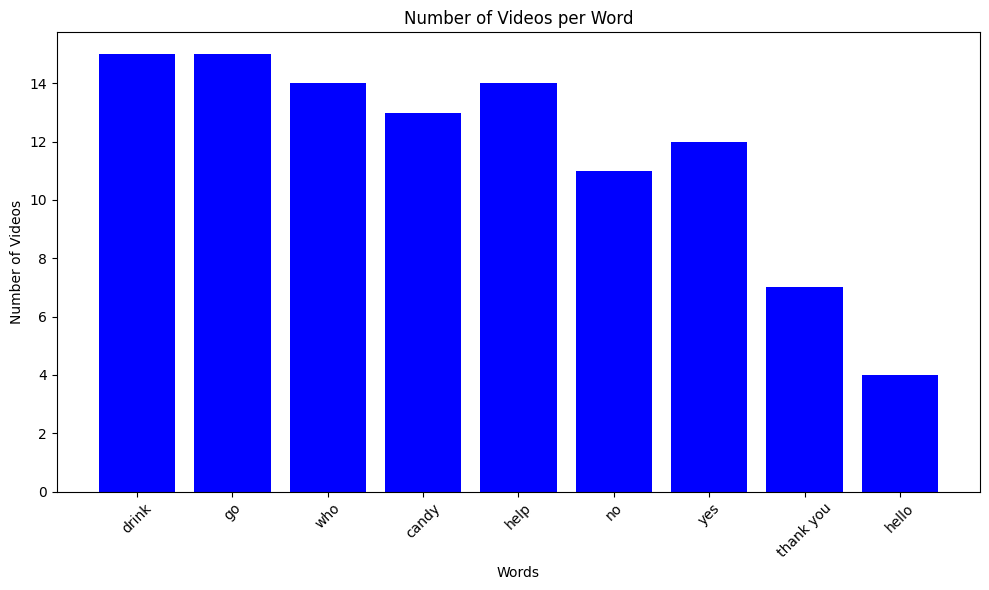

In [42]:
words = list(exist_video_ids.keys())
video_counts = [len(v) for v in exist_video_ids.values()]

plt.figure(figsize=(10,6))
plt.bar(words, video_counts, color='blue')
plt.xlabel('Words')
plt.ylabel('Number of Videos')
plt.title('Number of Videos per Word')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
def extract_video_frames(vid_file, out_dir):
    video_capture = cv2.VideoCapture(vid_file)
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames <= 30:
        frames_to_extract = total_frames
        skip_frames = 1
    else:
        frames_to_extract = 30
        skip_frames = total_frames // 30

    os.makedirs(out_dir, exist_ok=True)
    extracted_count = 0
    for i in range(0, total_frames, skip_frames):
        if extracted_count >= frames_to_extract:
            break
        video_capture.set(cv2.CAP_PROP_POS_FRAMES, i)
        success, frame = video_capture.read()
        if not success:
            continue
        frame_path = os.path.join(out_dir, f"{extracted_count + 1}.jpg")
        frame = cv2.resize(frame, (640, 480))
        cv2.imwrite(frame_path, frame)
        extracted_count += 1
    video_capture.release()

In [46]:
WLASL_PATH = "../../WLASL_dataset"
WLASL_vedio_PATH="/home/lizi/Desktop/WLASL/videos"

In [48]:

for key, ids in exist_video_ids.items():
    for sequence, id in enumerate(ids):
        os.makedirs(os.path.join(WLASL_PATH, key, str(sequence)), exist_ok=True)
        video_path = os.path.join(WLASL_vedio_PATH, f"{id}.mp4")
        output_dir = os.path.join(WLASL_PATH, key, str(sequence))
        extract_video_frames(video_path, output_dir)
        frame_files = sorted([os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith('.jpg')])

In [ ]:
#two agumentation method 
def random_scale(img,scale_factor):
    h, w, _ = img.shape
    
    new_h = int(h * scale_factor)
    new_w = int(w * scale_factor)

    resized = cv2.resize(img, (new_w, new_h))
    if scale_factor < 1:
        pad_h = h - new_h
        pad_w = w - new_w
        return cv2.copyMakeBorder(resized, pad_h // 2, pad_h - pad_h // 2, pad_w // 2, pad_w - pad_w // 2, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    else:
        return resized[int((new_h - h)/2):int((new_h + h)/2), int((new_w - w)/2):int((new_w + w)/2)]


# def random_rotate(img,angle):
#     h, w, _ = img.shape
#     matrix = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
#     return cv2.warpAffine(img, matrix, (w, h))

def random_rotate(img, angle):
    h, w, _ = img.shape
    matrix = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1)
    rotated_img = cv2.warpAffine(img, matrix, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))
    return rotated_img



In [ ]:
#agumemntation for a sequence 
def agument_sequence(input_dir,output_dir):
    # input_dir : a sequece folder from ariginal dataset
    # output_dir :an action folder 
    scale_factors = [0.8 + i * 0.04 for i in range(10)]# from 0.8 to 1.2 take 10 values
    angles = [-15 + i * 3 for i in range(10)]#from -15 to 15 take 10 values
    dirs = [os.path.join(input_dir, frame) for frame in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, frame))]
    f = 0
    for scale_factor in scale_factors:
        for angle in angles:
            out_folder = os.path.join(output_dir,f)
            os.makedirs(out_folder, exist_ok=True)
            #make folder for an augment
            i = 0
            for dir in dirs: 
                img = cv2.imread(dir)
                i_mg = random_scale(img,scale_factor)
                im_g = random_rotate(i_mg,angle)
                cv2.imwrite(os.path.join(out_folder,i),im_g)
                i=i+1
            



In [49]:
WLASL_PATH = "../../WLASL_agument"
for key, _ in exist_video_ids.items():
    os.makedirs(os.path.join(WLASL_PATH, key), exist_ok=True)


